In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bp_df = pd.read_csv('Contextual_test_BPClass.csv')
bg_df = pd.read_csv('Contextual_test_BGClass.csv')
bpbg_df = pd.read_csv('Contextual_test_BPBGClass.csv')

## Table 1 - Inconsistent

In [27]:
print(bp_df.columns)
print(bg_df.columns)
print(bpbg_df.columns)

Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'cvdrisk_fb', 'state_code_cln', 'action_code_cln',
       'med_list_cln', 'sbp_fb_cln', 'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'hba1c_fb', 'cvdrisk_fb', 'state_code_cln',
       'action_code_cln', 'med_list_cln', 'sbp_fb_cln', 'hba1c_fb_cln',
       'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_b

In [28]:
def check_inconsistent_data(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    # select rows with inconsistent `action_code` and `action_code_cln`
    inconsistent_df = df.loc[df['action_code'] != df['action_code_cln']]
    print('inconsistent_df.shape: ', inconsistent_df.shape)

    inconsistent_df_len = inconsistent_df.shape[0]

    print('---inconsistent_df_len / df_len %: {:.2f}'.format(inconsistent_df_len / df_len * 100))

    if flag == 'bp' or flag == 'bpbg':
        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 125].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 125].shape[0]

        print('---sbp_fb_mean: {:.2f}[{:.2f}]'.format(sbp_fb_mean, sbp_fb_std))
        print('---sbp_fb_cln_mean: {:.2f}[{:.2f}]'.format(sbp_fb_cln_mean, sbp_fb_cln_std))
        print('---sbp_fb_140: {:.2f}'.format(sbp_fb_140/inconsistent_df_len*100))
        print('---sbp_fb_140_cln: {:.2f}'.format(sbp_fb_140_cln/inconsistent_df_len*100))
    
    if flag == 'bg' or flag == 'bpbg':
        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.5].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.5].shape[0]

        print('---hba1c_fb_mean: {:.2f}[{:.2f}]'.format(hba1c_fb_mean, hba1c_fb_std))
        print('---hba1c_fb_cln_mean: {:.2f}[{:.2f}]'.format(hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('---hba1c_fb_8: {:.2f}'.format(hba1c_fb_8/inconsistent_df_len*100))
        print('---hba1c_fb_8_cln: {:.2f}'.format(hba1c_fb_8_clb/inconsistent_df_len*100))

    cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
    cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
    cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
    cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]

    print('---cvdrisk_fb_mean: {:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std))
    print('---cvdrisk_fb_cln_mean: {:.2f}[{:.2f}]'.format(cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
    print('---cvdrisk_fb_20: {:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100))
    print('---cvdrisk_fb_20_cln: {:.2f}'.format(cvdrisk_fb_20_cln/inconsistent_df_len*100))
    
    
check_inconsistent_data(bp_df, 'bp')
check_inconsistent_data(bg_df, 'bg')
check_inconsistent_data(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
inconsistent_df.shape:  (65549, 21)
---inconsistent_df_len / df_len %: 75.07
---sbp_fb_mean: 125.73[3.01]
---sbp_fb_cln_mean: 125.61[2.65]
---sbp_fb_140: 59.51
---sbp_fb_140_cln: 58.03
---cvdrisk_fb_mean: 0.20[0.12]
---cvdrisk_fb_cln_mean: 0.21[0.12]
---cvdrisk_fb_20: 41.14
---cvdrisk_fb_20_cln: 45.23

---bg---
df.shape:  (161440, 23)
inconsistent_df.shape:  (158670, 23)
---inconsistent_df_len / df_len %: 98.28
---hba1c_fb_mean: 6.99[0.15]
---hba1c_fb_cln_mean: 7.10[0.27]
---hba1c_fb_8: 0.06
---hba1c_fb_8_cln: 6.12
---cvdrisk_fb_mean: 0.23[0.12]
---cvdrisk_fb_cln_mean: 0.23[0.12]
---cvdrisk_fb_20: 50.01
---cvdrisk_fb_20_cln: 52.54

---bpbg---
df.shape:  (71860, 23)
inconsistent_df.shape:  (65449, 23)
---inconsistent_df_len / df_len %: 91.08
---sbp_fb_mean: 124.07[2.18]
---sbp_fb_cln_mean: 126.49[2.68]
---sbp_fb_140: 31.64
---sbp_fb_140_cln: 71.00
---hba1c_fb_mean: 7.58[0.18]
---hba1c_fb_cln_mean: 7.13[0.32]
---hba1c_fb_8: 65.35
---hba1c_fb_8_cln: 12.38


## Table 2 - Demographics

In [30]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [31]:
def check_demographics(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    # select rows with inconsistent `action_code` and `action_code_cln`
    inconsistent_df = df.loc[df['action_code'] != df['action_code_cln']]
    print('inconsistent_df.shape: ', inconsistent_df.shape)

    consistent_df = df.loc[df['action_code'] == df['action_code_cln']]
    print('consistent_df.shape: ', consistent_df.shape)

    inconsistent_df_len = inconsistent_df.shape[0]
    consistent_df_len = consistent_df.shape[0]

    print('---NO inconsistent_df_len / df_len %: {:.2f}'.format(inconsistent_df_len / df_len * 100))
    print('---YES consistent_df_len / df_len %: {:.2f}'.format((consistent_df_len) / df_len * 100))

    print('---No inconsistent df.describe()---')
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(inconsistent_df.describe())

    print('---Yes consistent df.describe()---')
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(consistent_df.describe())

check_demographics(bp_df, 'bp')
check_demographics(bg_df, 'bg')
check_demographics(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
inconsistent_df.shape:  (65549, 21)
consistent_df.shape:  (21771, 21)
---NO inconsistent_df_len / df_len %: 75.07
---YES consistent_df_len / df_len %: 24.93
---No inconsistent df.describe()---
              MaskId     Visit_num  baseline_age        female  \
count   65549.000000  65549.000000  65549.000000  65549.000000   
mean   105184.441578      9.355215     62.693431      0.471144   
std      2916.543230      5.919069      6.717682      0.499170   
min    100001.000000      0.000000     44.400000      0.000000   
25%    102652.000000      4.000000     57.600000      0.000000   
50%    105151.000000      9.000000     61.900000      0.000000   
75%    107762.000000     15.000000     67.000000      1.000000   
max    110251.000000     19.000000     79.300000      1.000000   

       race_whiteother  edu_baseline_1  edu_baseline_2  edu_baseline_3  \
count     65549.000000    65549.000000    65549.000000    65549.000000   
mean          0.774245        0

## Table 4 - Check Subgroup

In [42]:
def check_feedback(df_sub, flag):
    res = []
    res.append(df_sub.shape[0])
    
    if flag == 'bp':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)

    if flag == 'bg':
        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    if flag == 'bpbg':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)                

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    # print values in res in a row
    print('\t'.join(map(str, res)))

def check_subgroup(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    df_sub = df.loc[df['baseline_age'] > 60]
    # print('age>60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['baseline_age'] <= 60]
    # print('age<=60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 1]
    # print('female:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 0]
    # print('male:')
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['race_whiteother'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['race_whiteother'] == 0]
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['cvd_hx_baseline'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cvd_hx_baseline'] == 0]
    check_feedback(df_sub, flag)   

    df_sub = df.loc[df['cigarett_baseline_1'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cigarett_baseline_1'] == 0]
    check_feedback(df_sub, flag)      

    df_sub = df.loc[df['baseline_BMI'] >= 25]
    check_feedback(df_sub, flag)


check_subgroup(bp_df, 'bp')
check_subgroup(bg_df, 'bg')
check_subgroup(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
52400	126.85[2.89]	126.74[2.64]	0.11[2.96]	0.25[0.12]	0.26[0.12]	-0.02[0.05]
34920	125.16[2.82]	125.09[2.56]	0.07[2.96]	0.13[0.06]	0.14[0.07]	-0.01[0.03]
41480	126.47[2.99]	126.37[2.70]	0.10[2.95]	0.14[0.08]	0.16[0.09]	-0.01[0.03]
45840	125.91[2.95]	125.82[2.73]	0.08[2.97]	0.25[0.12]	0.27[0.13]	-0.02[0.05]
67300	125.35[2.58]	125.31[2.34]	0.04[2.96]	0.19[0.11]	0.21[0.12]	-0.02[0.04]
20020	128.93[2.56]	128.68[2.33]	0.26[2.97]	0.22[0.13]	0.24[0.13]	-0.02[0.04]
29320	126.04[3.03]	125.97[2.76]	0.06[2.94]	0.21[0.12]	0.23[0.13]	-0.02[0.04]
58000	126.24[2.95]	126.14[2.72]	0.10[2.97]	0.19[0.11]	0.21[0.11]	-0.02[0.04]
11660	126.00[2.95]	126.01[2.71]	-0.01[2.96]	0.27[0.13]	0.29[0.13]	-0.02[0.05]
75660	126.20[2.98]	126.09[2.73]	0.11[2.96]	0.19[0.11]	0.20[0.11]	-0.02[0.04]
79180	126.13[2.98]	126.00[2.73]	0.13[2.96]	0.20[0.11]	0.21[0.12]	-0.02[0.04]

---bg---
df.shape:  (161440, 23)
100860	6.93[0.13]	7.04[0.26]	-0.12[0.23]	0.28[0.12]	0.29[0.12]	-0.01[0.01]
60580	7.09

## Fig 1 2 3 - Med Class Combo Frequency plot


---bp---


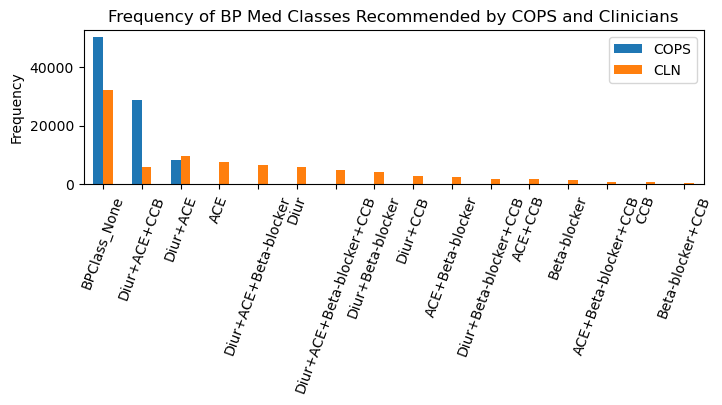


---bg---


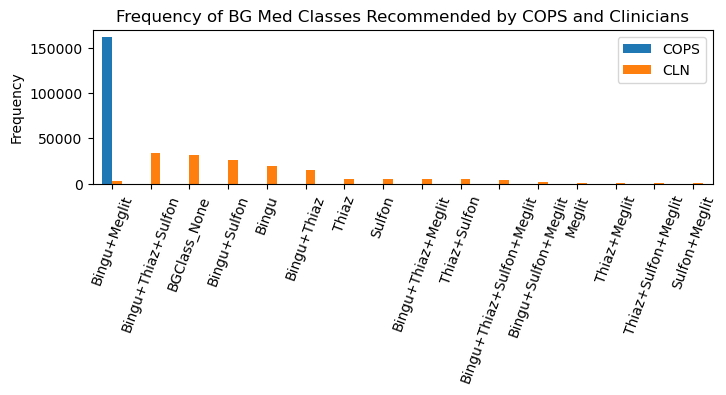


---bpbg---


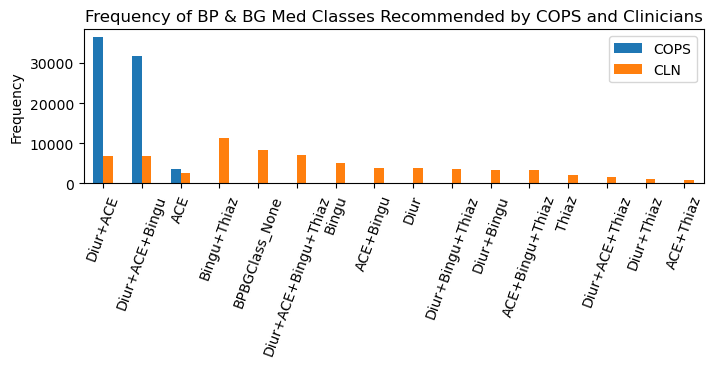

In [63]:
# use bar chart to show the frequency of med_list Column for COPS and Clinicians
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    # get the frequency count of each unique value in med_list Column in bp_df
    med_COPS = df['med_list'].value_counts()
    med_CLN = df['med_list_cln'].value_counts()

    # merge the two series into a dataframe
    med_df = pd.concat([med_COPS, med_CLN], axis=1)
    med_df.columns = ['COPS', 'CLN']
    # fill the NaN with 0
    med_df = med_df.fillna(0)
    # print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(8,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    # plt.xlabel('med_list')
    # rotate x-axis label
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Med Class Frequency plot


---bp---
med_cops:  {'Diur': 37147, 'ACE': 37147, 'CCB': 28788, 'BPClass_None': 50173}
med_cln:  {'ACE': 38930, 'Diur': 40769, 'CCB': 18326, 'BPClass_None': 32061, 'Beta-blocker': 21787}
                 COPS      CLN
Diur          37147.0  40769.0
ACE           37147.0  38930.0
CCB           28788.0  18326.0
BPClass_None  50173.0  32061.0
Beta-blocker      0.0  21787.0


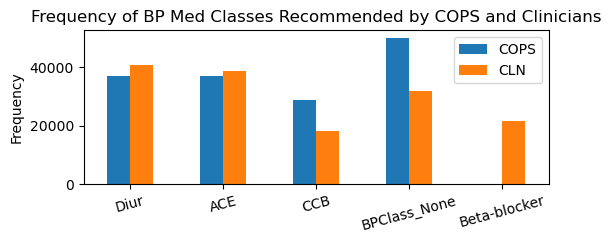


---bg---
med_cops:  {'Bingu': 161440, 'Meglit': 161440}
med_cln:  {'BGClass_None': 32183, 'Bingu': 109584, 'Thiaz': 72235, 'Sulfon': 78281, 'Meglit': 17287}
                  COPS       CLN
Bingu         161440.0  109584.0
Meglit        161440.0   17287.0
BGClass_None       0.0   32183.0
Thiaz              0.0   72235.0
Sulfon             0.0   78281.0


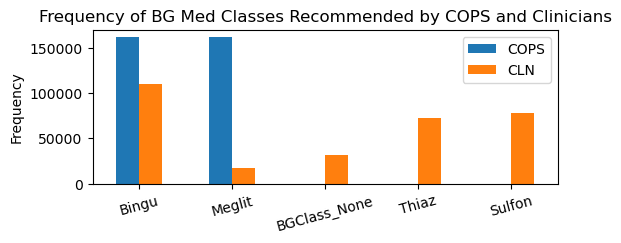


---bpbg---
med_cops:  {'Diur': 68269, 'ACE': 71860, 'Bingu': 31711}
med_cln:  {'ACE': 32740, 'Diur': 34460, 'Bingu': 44629, 'Thiaz': 31279, 'BPBGClass_None': 8318}
                   COPS      CLN
Diur            68269.0  34460.0
ACE             71860.0  32740.0
Bingu           31711.0  44629.0
Thiaz               0.0  31279.0
BPBGClass_None      0.0   8318.0


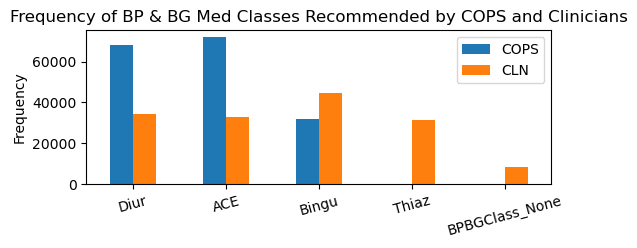

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS', 'CLN']
    print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(6,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Success Rate